In [8]:
import cv2

In [9]:
import numpy as np

In [10]:
cap = cv2.VideoCapture('video.mp4')

In [11]:
# Substructor algo
algo = cv2.bgsegm.createBackgroundSubtractorMOG()

In [12]:
count_line_position = 550
min_width_rect = 80
min_height_rect = 80

In [13]:
while True:
    ret,frame1 = cap.read()
    grey = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(grey,(3,3),5)
    img_sub = algo.apply(blur)
    dilat = cv2.dilate(img_sub,np.ones((5,5)))
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    dilate_ = cv2.morphologyEx(dilat,cv2.MORPH_CLOSE, kernel)
    dilate_ = cv2.morphologyEx(dilate_,cv2.MORPH_CLOSE, kernel)
    counterShape,h = cv2.findContours(dilate_, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    cv2.line(frame1,(25,count_line_position),(1200,count_line_position),(197,123,175),3)
    
    cv2.imshow('Original video',dilate_)
    
    for i,c in enumerate(counterShape):
        (x,y,w,h) =cv2.boundingRect(c)
        validate_counter = (w >= min_width_rect) and (h >= min_height_rect)
        if not validate_counter:
            continue
        cv2.rectangle(frame1,(x,y),(x+w,y+h),(0,0,255),2)
    
    
    #cv2.imshow('Original video',frame1)
    if cv2.waitKey(1) == 13:
        break
cv2.destroyAllWindows()
cap.release()

In [1]:
#yolo algorithm

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
yolo = cv2.dnn.readNet("yolov3.weights","yolov3.cfg")

In [6]:
classes = []

with open("coco.names",'r') as f:
    classes = f.read().splitlines()

In [7]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [17]:
img = cv2.imread("test.png")
height = img.shape[0]
width = img.shape[1]
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB = True, crop = False)

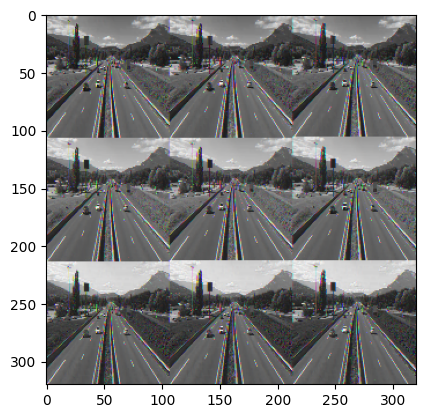

In [18]:
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [19]:
yolo.setInput(blob)

output_layers_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layers_name)

In [37]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        
        if confidence > 0.7:
            center_x = int(detection[0]*width)
            center_y = int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([w,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [38]:
len(boxes)

5

In [39]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [40]:
font = cv2.FONT_HERSHEY_SIMPLEX
colors = np.random.uniform(0,255, size = (len(boxes) , 3))

In [41]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i],2))
    color = colors[i]
    cv2.rectangle(img,(x,y),(x+w,y+h),color,1)
    cv2.putText(img,label+" "+confi,(x,y+20),font,2,(255,255,255),5
                
               )

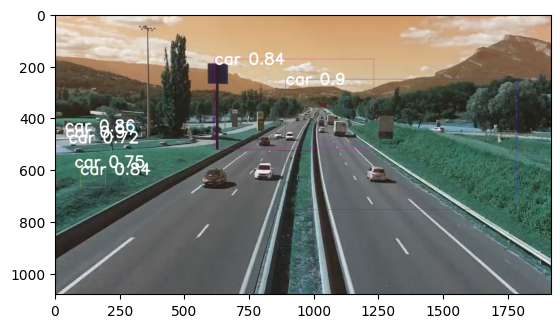

In [42]:
plt.imshow(img)

In [43]:
cv2.imwrite("output.jpg",img)

True